In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv('incomes.csv')
income = pd.DataFrame(data)

In [51]:
income.head(5)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

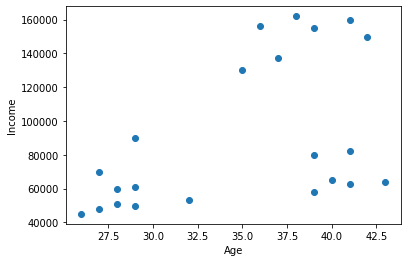

In [52]:
plt.scatter(income.Age,income['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

WE CAN SEE Clusters there

In [53]:
from sklearn.cluster import KMeans
# km = KMeans(n_clusters=3)
# y_pred = km.fit(income[['Age','Income($)']])
# y_pred

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(income[['Age','Income($)']])
y_predicted


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [54]:
income['cluster'] = y_predicted
income.head(3)

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2


In [55]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [56]:
inc0 = income[income.cluster==0]
inc1 = income[income.cluster==1]
inc2 = income[income.cluster==2]

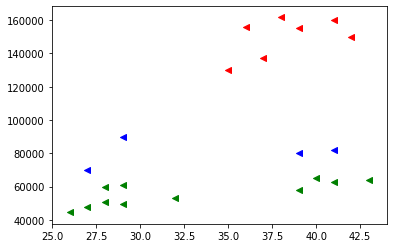

In [57]:
plt.scatter(inc0['Age'],inc0['Income($)'],color='blue',marker='<')
plt.scatter(inc1['Age'],inc1['Income($)'],color='red',marker='<')
plt.scatter(inc2['Age'],inc2['Income($)'],color='green',marker='<')

#### ALONG WITH CENTROIDS

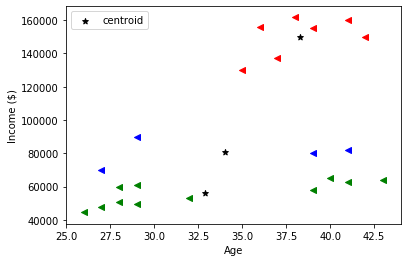

In [58]:
plt.scatter(inc0['Age'],inc0['Income($)'],color='blue',marker='<')
plt.scatter(inc1['Age'],inc1['Income($)'],color='red',marker='<')
plt.scatter(inc2['Age'],inc2['Income($)'],color='green',marker='<')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

#### THESE CLUSTERS AREN'T CLEAR ENOUGH YET HENCE WE USE MinMaxScalar()

In [59]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

mms.fit(income[['Income($)']])
income['Income($)'] = mms.transform(income[['Income($)']])

mms.fit(income[['Age']])
income['Age'] = mms.transform(income[['Age']])

### The values are in between 0 and 1 now doing all from start now

In [60]:

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(income[['Age','Income($)']])
y_predicted


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [61]:
income['cluster'] = y_predicted
income.head(3)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1


In [62]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

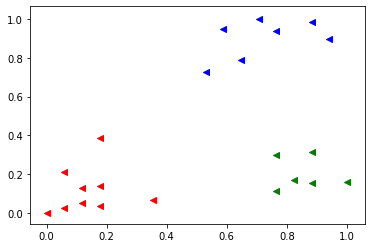

In [68]:
inc0 = income[income.cluster==0]
inc1 = income[income.cluster==1]
inc2 = income[income.cluster==2]

plt.scatter(inc0['Age'],inc0['Income($)'],color='blue',marker='<')
plt.scatter(inc1['Age'],inc1['Income($)'],color='red',marker='<')
plt.scatter(inc2['Age'],inc2['Income($)'],color='green',marker='<')
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
# plt.xlabel('Age')
# plt.ylabel('Income ($)')
# plt.legend()

#### NOW, CLUSTERS ARE CLEAR ENOUGH

#### ELBOW PLOT NOW: (K V/S SSE) : To Decide How Many Clusters are Good For Our Model:

In [64]:
sse=[]
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(income[['Age','Income($)']])
    sse.append(km.inertia_)

In [65]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2621792762345213,
 0.21055478995472493,
 0.16858512236029757,
 0.14090581089405507,
 0.1062989742140513]

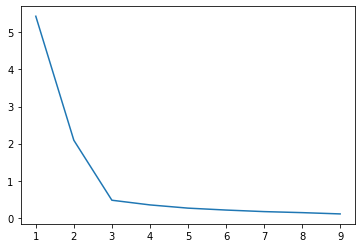

In [66]:
plt.plot(k_range,sse)

    Elbow at 3 meaning 3 is the number of clusters required